# Modul 5 Persamaan Diferensial Numerik: Sistem PDB orde 1 dan PDB orde tinggi

Kembali ke [Persamaan Diferensial Numerik](./pdnum2024genap.qmd)

## Sistem Persamaan Diferensial: *(fourth-order) Runge-Kutta for Systems*

### Bentuk umum

Bentuk umum sistem Persamaan Diferensial:

$u'_1 = f_1(t,u_1,u_2,...,u_m)$

$u'_2 = f_2(t,u_1,u_2,...,u_m)$

$...$

$u'_m = f_m(t,u_1,u_2,...,u_m)$

dengan:

$a \leq t \leq b$

$u_1(a)=a_1, u_2(a)=a_2, ..., u_m(a)=a_m$ (initial value)

Bentuk umum algoritma metode untuk sistem PDB orde 1

```
for i = 1 : N do
    for R in (rumus-rumus untuk iterasi ke-i) do
        for j = 1 : m do
            Hitung R dengan f_j
        endfor
    endfor
endfor
```

Misalnya, apabila ada lima rumus (seperti dalam metode Runge-Kutta orde 4), algoritma untuk sistem menjadi:

```
for i = 1 : N do
    for j = 1 : m do
        Hitung Rumus1 dengan f_j
    endfor

    for j = 1 : m do
        Hitung Rumus2 dengan f_j
    endfor

    for j = 1 : m do
        Hitung Rumus3 dengan f_j
    endfor

    for j = 1 : m do
        Hitung Rumus4 dengan f_j
    endfor

    for j = 1 : m do
        Hitung Rumus5 dengan f_j
    endfor
endfor
```

Apabila misalnya rumus pada iterasi 1, 2, 3 berbeda dengan rumus pada iterasi 4+ (seperti untuk metode Adams predictor-corrector orde 4), algoritma untuk sistem bisa seperti berikut:

```
for i = 1 : 3 do
    for j = 1 : m do
        Hitung Rumus1 dengan f_j
    endfor

    for j = 1 : m do
        Hitung Rumus2 dengan f_j
    endfor

    for j = 1 : m do
        Hitung Rumus3 dengan f_j
    endfor

    for j = 1 : m do
        Hitung Rumus4 dengan f_j
    endfor

    for j = 1 : m do
        Hitung Rumus5 dengan f_j
    endfor 
endfor

for i = 4 : N do
    for j = 1 : m do
        Hitung Rumus1 dengan f_j
    endfor

    for j = 1 : m do
        Hitung Rumus2 dengan f_j
    endfor
endfor
```

### Function file: (fourth-order) Runge-Kutta for systems

Pada modul ini, akan dibahas mengenai metode Runge-Kutta untuk menyelesaikan sistem persamaan diferensial. Berikut merupakan code dari metode Runge-Kutta untuk sistem persamaan diferensial pada Octave yang perlu disimpan pada function file.

Untuk dua PDB:

In [ ]:
function [t, w1, w2] = rko4_sys2(f1, f2, a, b, n, alph1, alph2)
  h = (b - a)/n;
  t = w1 = w2 = [];
  t(1) = a;
  w1(1) = alph1;
  w2(1) = alph2;
  for i = 1:n
    k11 = h * f1(t(i), w1(i), w2(i));
    k12 = h * f2(t(i), w1(i), w2(i));

    k21 = h * f1((t(i)+(h/2)), (w1(i)+(k11/2)), (w2(i)+(k12/2)));
    k22 = h * f2((t(i)+(h/2)), (w1(i)+(k11/2)), (w2(i)+(k12/2)));

    k31 = h * f1((t(i)+(h/2)), (w1(i)+(k21/2)), (w2(i)+(k22/2)));
    k32 = h * f2((t(i)+(h/2)), (w1(i)+(k21/2)), (w2(i)+(k22/2)));

    k41 = h * f1((t(i)+h), (w1(i)+k31), (w2(i)+k32));
    k42 = h * f2((t(i)+h), (w1(i)+k31), (w2(i)+k32));

    w1(i+1) = w1(i) + (k11 + 2*k21 + 2*k31 + k41)/6;
    w2(i+1) = w2(i) + (k12 + 2*k22 + 2*k32 + k42)/6;
    t(i+1) = a + i*h;
  endfor
endfunction

Untuk m PDB:

In [3]:
function [t, w] = rko4_sysm(cell_f, a, b, N, alphas)
  m = length(cell_f);

  h = (b - a) / N;
  t = zeros(N + 1, 1);
  w = zeros(m, N + 1);
  t(1) = a;
  w(:, 1) = alphas;

  k1 = zeros(m, 1);
  k2 = zeros(m, 1);
  k3 = zeros(m, 1);
  k4 = zeros(m, 1);
  for i = 1 : N
    t(i + 1) = t(i) + h;

    for j = 1 : m
      k1(j) = h * cell_f{j}(t(i), w(:, i));
    endfor

    for j = 1 : m
      k2(j) = h * cell_f{j}(t(i) + (h / 2), w(:, i) + (k1 / 2));
    endfor

    for j = 1 : m
      k3(j) = h * cell_f{j}(t(i) + (h / 2), w(:, i) + (k2 / 2));
    endfor

    for j = 1 : m
      k4(j) = h * cell_f{j}(t(i + 1), w(:, i) + k3);
    endfor

    for j = 1 : m
      w(j, i + 1) = w(j, i) + (k1(j) + 2 * k2(j) + 2 * k3(j) + k4(j)) / 6;
    endfor
  endfor
endfunction

### Contoh sistem PD

$u'_1 = -4u_1+3u_2+6, \;u_1(0)=0$

$u'_2 = -2.4u_1+1.6u_2+3.6, \;u_2(0)=0$

Akan diuji dengan $h=0.1$ dan $0\leq t \leq 0.5$

Solusi eksak:

$u_1(t)=-3.375e^{-2t}+1.875e^{-0.4t}+1.5$

$u_2(t) = -2.25e^{-2t}+2.25e^{-0.4t}$

Berikut adalah code script file untuk menjalankan function metode Runge-Kutta untuk sistem PD di atas (menggunakan yang khusus dua persamaan):

In [ ]:
f1 = @(t, y1, y2) (-4*y1 + 3*y2 + 6);
f2 = @(t, y1, y2) (-2.4*y1 + 1.6*y2 + 3.6);

a = 0;
b = 0.5;
n = 5;
alph1 = 0;
alph2 = 0;

[t, w1, w2] = rko4_sys2(f1, f2, a, b, n, alph1, alph2);

sln1 = @(t) (-3.375*exp(-2*t) + 1.875*exp(-0.4*t) + 1.5);
sln2 = @(t) (-2.25*exp(-2*t) + 2.25*exp(-0.4*t));

w1ex = w2ex = [];
for i = 1:length(t)
  w1ex(i) = sln1(t(i));
  w2ex(i) = sln2(t(i));
endfor

[t', w1', w2', w1ex', w2ex']

hold on;
fplot(sln1, [0, 0.5], 'r');
fplot(sln2, [0, 0.5], 'b');
scatter(t, w1, 'r');
scatter(t, w2, 'b');
legend('u1', 'u2');
legend('location', 'northwest');

Jika kita run script file tersebut, maka program akan mengeluarkan dua macam output, yaitu tabel serta plot perbandingan solusi eksak dan aproksimasi seperti di bawah ini:

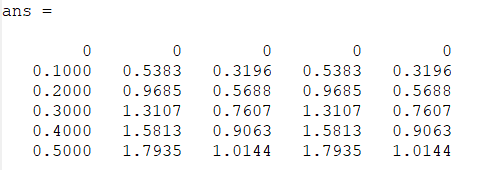

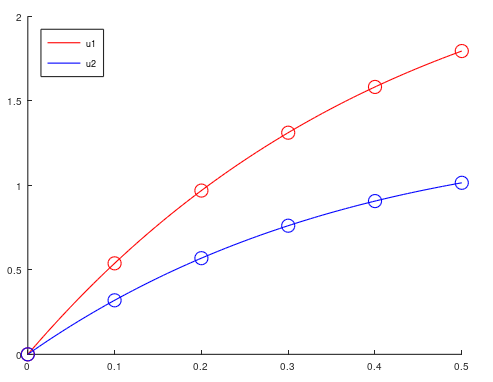

Berikut conoth script file menggunakan kode yang untuk m persamaan.

ans =

        0        0        0        0        0
   0.1000   0.5383   0.3196   0.5383   0.3196
   0.2000   0.9685   0.5688   0.9685   0.5688
   0.3000   1.3107   0.7607   1.3107   0.7607
   0.4000   1.5813   0.9063   1.5813   0.9063
   0.5000   1.7935   1.0144   1.7935   1.0144



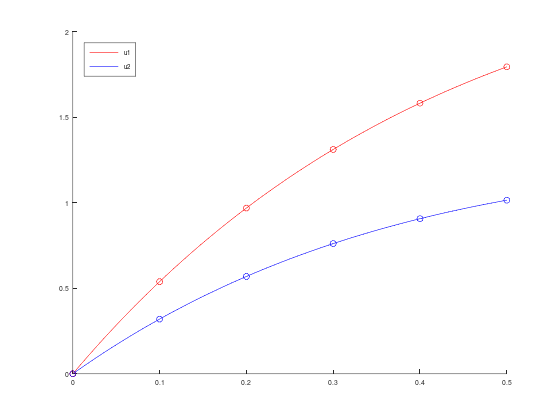

In [5]:
f1 = @(t, y) (-4*y(1) + 3*y(2) + 6);
f2 = @(t, y) (-2.4*y(1) + 1.6*y(2) + 3.6);

a = 0;
b = 0.5;
N = 5;
alpha1 = 0;
alpha2 = 0;

[t, w] = rko4_sysm({f1, f2}, a, b, N, [alpha1, alpha2]);

sln1 = @(t) (-3.375*exp(-2*t) + 1.875*exp(-0.4*t) + 1.5);
sln2 = @(t) (-2.25*exp(-2*t) + 2.25*exp(-0.4*t));

w1ex = zeros(N+1, 1);
w2ex = zeros(N+1, 1);
for i = 1:length(t)
  w1ex(i) = sln1(t(i));
  w2ex(i) = sln2(t(i));
endfor

[t, w', w1ex, w2ex]

hold on;
fplot(sln1, [0, 0.5], 'r');
fplot(sln2, [0, 0.5], 'b');
scatter(t, w(1, :), 'r');
scatter(t, w(2, :), 'b');
legend('u1', 'u2');
legend('location', 'northwest');

Sebenarnya, kita bisa saja menampilkan dua plot yang terpisah, menggunakan perintah `figure`

ans =

        0        0        0        0        0
   0.1000   0.5383   0.3196   0.5383   0.3196
   0.2000   0.9685   0.5688   0.9685   0.5688
   0.3000   1.3107   0.7607   1.3107   0.7607
   0.4000   1.5813   0.9063   1.5813   0.9063
   0.5000   1.7935   1.0144   1.7935   1.0144



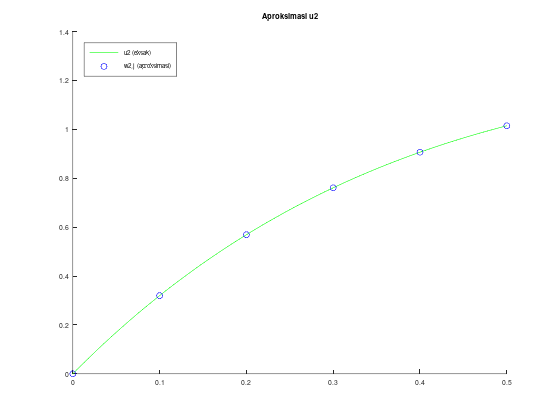

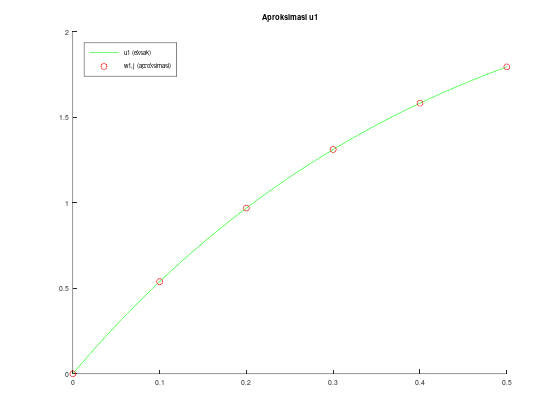

In [8]:
f1 = @(t, y) (-4*y(1) + 3*y(2) + 6);
f2 = @(t, y) (-2.4*y(1) + 1.6*y(2) + 3.6);

a = 0;
b = 0.5;
N = 5;
alpha1 = 0;
alpha2 = 0;

[t, w] = rko4_sysm({f1, f2}, a, b, N, [alpha1, alpha2]);

sln1 = @(t) (-3.375*exp(-2*t) + 1.875*exp(-0.4*t) + 1.5);
sln2 = @(t) (-2.25*exp(-2*t) + 2.25*exp(-0.4*t));

w1ex = zeros(N+1, 1);
w2ex = zeros(N+1, 1);
for i = 1:length(t)
  w1ex(i) = sln1(t(i));
  w2ex(i) = sln2(t(i));
endfor

[t, w', w1ex, w2ex]

figure;
hold on;
fplot(sln1, [0, 0.5], 'g');
scatter(t, w(1, :), 'r');
title("Aproksimasi u1");
legend("u1 (eksak)", "w1,j (aproksimasi)")
legend('location', 'northwest');

figure;
hold on;
fplot(sln2, [0, 0.5], 'g');
scatter(t, w(2, :), 'b');
title("Aproksimasi u2");
legend("u2 (eksak)", "w2,j (aproksimasi)")
legend('location', 'northwest');

## Sistem Persamaan Diferensial: Contoh Metode Lainnya

### Untuk metode Taylor orde $n$

In [1]:
function [t, w] = taylor_sysm(cell_f, cell_fp, a, b, N, alphas)
  m = length(cell_f);
  
  h = (b - a) / N;
  n = length(cell_fp{1}) + 1;
  t = zeros(N + 1, 1);
  w = zeros(m, N + 1);
  t(1) = a;
  w(:, 1) = alphas;
  for i = 1 : N
    t(i + 1) = t(i) + h;
    
    for j = 1 : m
      T = cell_f{j}(t(i), w(:, i));
      for p = 2 : n
        T += h^(p-1) * cell_fp{j}{p-1}(t(i), w(:, i)) / factorial(p);
      endfor
      w(j, i + 1) = w(j, i) + h * T;
    endfor
  endfor
endfunction

Mencoba untuk masalah yang sama, misalnya dengan n=1 (metode Euler):

ans =

        0        0        0        0        0
   0.1000   0.6000   0.3600   0.5383   0.3196
   0.2000   1.0680   0.6336   0.9685   0.5688
   0.3000   1.4309   0.8387   1.3107   0.7607
   0.4000   1.7101   0.9894   1.5813   0.9063
   0.5000   1.9229   1.0973   1.7935   1.0144



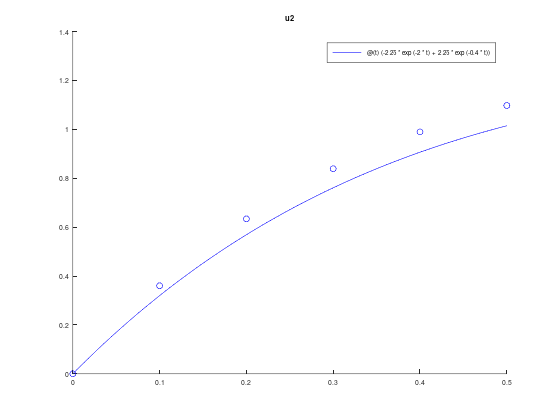

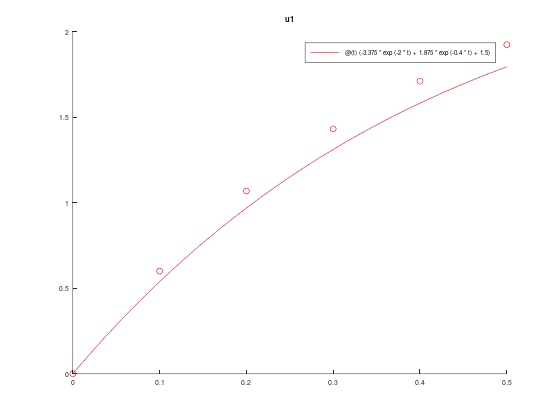

In [2]:
f1 = @(t, u) (-4*u(1) +3*u(2) + 6);
f2 = @(t, u) (-2.4*u(1) + 1.6*u(2) + 3.6);

a = 0;
b = 0.5;
h = 0.1;
N = (b - a) / 0.1;
alpha1 = 0;
alpha2 = 0;

[t, w] = taylor_sysm({f1, f2}, {{}, {}}, a, b, N, [alpha1, alpha2]);

sln1 = @(t) (-3.375*exp(-2*t) + 1.875*exp(-0.4*t) + 1.5);
sln2 = @(t) (-2.25*exp(-2*t) + 2.25*exp(-0.4*t));

u1_eksak = sln1(t);
u2_eksak = sln2(t);

[t, w', u1_eksak, u2_eksak]

figure;
hold on;
fplot(sln1, [a,b], 'r');
scatter(t, w(1, :), 'r');
title("u1");

figure;
hold on;
fplot(sln2, [a,b], 'b');
scatter(t, w(2, :), 'b');
title("u2");

### Untuk metode Adams *predictor-corrector* orde 4

In [3]:
function [t, w] = adams_pc_orde4_sysm(cell_f, a, b, N, alphas)
  m = length(cell_f);
  
  % Inisiasi variabel awal
  h = (b - a) / N;
  t = zeros(N + 1, 1);
  w = zeros(m, N + 1);
  t(1) = a;
  w(:, 1) = alphas;
  
  % Hitung w(2), w(3), w(4) menggunakan metode Runge-Kutta orde 4
  k1 = zeros(m, 1);
  k2 = zeros(m, 1);
  k3 = zeros(m, 1);
  k4 = zeros(m, 1);
  for i = 1 : 3
      t(i + 1) = t(i) + h;
      
      for j = 1 : m
        k1(j) = h * cell_f{j}(t(i), w(:,i));
      endfor
      
      for j = 1 : m
        k2(j) = h * cell_f{j}(t(i) + (h/2), w(:,i) + (k1/2));
      endfor
      
      for j = 1 : m
        k3(j) = h * cell_f{j}(t(i) + (h/2), w(:,i) + (k2/2));
      endfor
      
      for j = 1 : m
        k4(j) = h * cell_f{j}(t(i + 1), w(:,i) + k3);
      endfor
      
      for j = 1 : m
        w(j,i+1) = w(j,i) + (k1(j) + 2*k2(j) + 2*k3(j) + k4(j)) / 6;
      endfor
  endfor
  
  % Algoritma utama Adams Predictor-Corrector orde 4
  m0 = zeros(m, 1);
  m1 = zeros(m, 1);
  m2 = zeros(m, 1);
  m3 = zeros(m, 1);
  m4 = zeros(m, 1);
  for i = 4 : N
    t(i + 1) = t(i) + h;
    
    for j = 1 : m
      m1(j) = cell_f{j}(t(i), w(:,i));
    endfor
    
    for j = 1 : m
      m2(j) = cell_f{j}(t(i-1), w(:,i-1));
    endfor 
    
    for j = 1 : m
      m3(j) = cell_f{j}(t(i-2), w(:,i-2));
    endfor
    
    for j = 1 : m
      m4(j) = cell_f{j}(t(i-3), w(:,i-3));
    endfor
    
    % Adams-Bashforth orde 4 (four-step)
    for j = 1 : m
      w(j,i+1) = w(j,i) + (h/24) * (55*m1(j) - 59*m2(j) + 37*m3(j) - 9*m4(j));
    endfor
    % Adams-Moulton orde 4 (three-step)
    for j = 1 : m
      m0(j) = cell_f{j}(t(i+1), w(:,i+1));
    endfor
    for j = 1 : m
      w(j,i+1) = w(j,i) + (h/24) * (9*m0(j) + 19*m1(j) - 5*m2(j) + m3(j));
    endfor
  endfor
endfunction

Mencoba untuk masalah yang sama:

ans =

        0        0        0        0        0
   0.1000   0.5383   0.3196   0.5383   0.3196
   0.2000   0.9685   0.5688   0.9685   0.5688
   0.3000   1.3107   0.7607   1.3107   0.7607
   0.4000   1.5813   0.9063   1.5813   0.9063
   0.5000   1.7936   1.0144   1.7935   1.0144



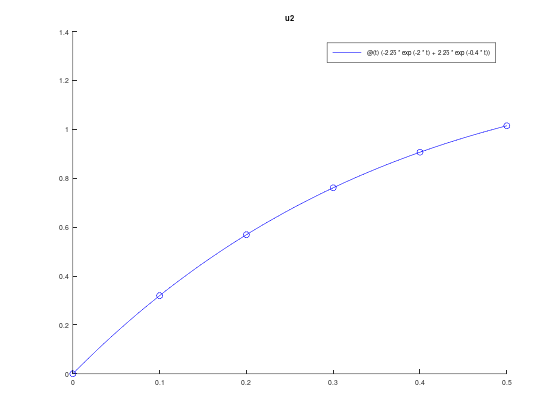

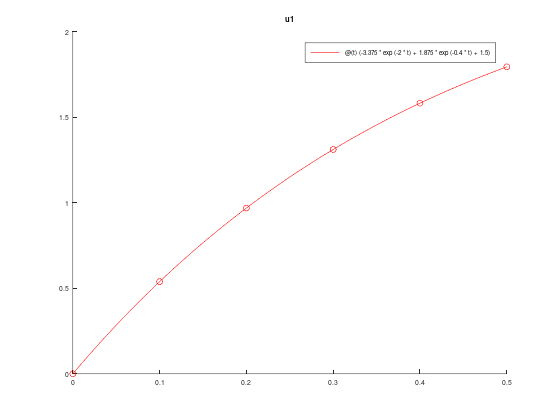

In [4]:
f1 = @(t, u) (-4*u(1) +3*u(2) + 6);
f2 = @(t, u) (-2.4*u(1) + 1.6*u(2) + 3.6);

a = 0;
b = 0.5;
h = 0.1;
N = (b - a) / 0.1;
alpha1 = 0;
alpha2 = 0;

[t, w] = adams_pc_orde4_sysm({f1, f2}, a, b, N, [alpha1, alpha2]);

sln1 = @(t) (-3.375*exp(-2*t) + 1.875*exp(-0.4*t) + 1.5);
sln2 = @(t) (-2.25*exp(-2*t) + 2.25*exp(-0.4*t));

u1_eksak = sln1(t);
u2_eksak = sln2(t);

[t, w', u1_eksak, u2_eksak]

figure;
hold on;
fplot(sln1, [a,b], 'r');
scatter(t, w(1, :), 'r');
title("u1");

figure;
hold on;
fplot(sln2, [a,b], 'b');
scatter(t, w(2, :), 'b');
title("u2");